# fbb scheleton notebook for PUI2016 HW6

In [367]:
from __future__ import print_function, division
import geopandas as gp
import pandas as pd
import pylab as pl
import os
import json
import urllib2
import sys
import csv
import zipfile
import statsmodels.api as sm
import statsmodels.formula.api as smf

if os.getenv("PUIDATA") is None:
    print ("$PUIDATA to point to set PUIdata dir")

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['test', 'var', 'e']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [287]:
# pull data from NYC OpenData API and read to dataframe

url = "https://data.cityofnewyork.us/resource/m46j-75iy.json"
response = urllib2.urlopen(url)
data = response.read().decode('utf-8')
data1 = json.loads(data)

nrg = pd.DataFrame(data1)
nrg.head()

,automatic_water_benchmarking_eligible,bbls_co_reported,borough,co_reported_bbl_status,direct_ghg_emissions_mtco2e,dof_benchmarking_submission_status,dof_number_of_buildings,dof_property_floor_area_buildngs_and_parking_ft2,energy_star_score,indirect_ghg_emissions_mtco2e,...,reported_property_floor_area_building_s_ft,reported_water_method,site_eui_kbtu_ft2,source_eui_kbtu_ft2,street_name,street_number,total_ghg_emissions_mtco2e,weather_normalized_site_eui_kbtu_ft2,weather_normalized_source_eui_kbtu_ft2,zip_code
0,N/A,1000410001,Manhattan,NaN,NaN,BBL not valid,NaN,NaN,Not Available,NaN,...,918919,N/A,NaN,NaN,NaN,NaN,NaN,Not Available,Not Available,NaN
1,Yes,NaN,Queens,NaN,NaN,No Submission Matched to BBL,1,82730,NaN,NaN,...,#N/A,None,NaN,NaN,108 STREET,63-10,NaN,NaN,NaN,11375
2,N/A,2027620097,Bronx,NaN,NaN,BBL not valid,NaN,NaN,Not Available,NaN,...,64200,N/A,NaN,NaN,NaN,NaN,NaN,Not Available,Not Available,NaN
3,No,NaN,Manhattan,NaN,NaN,No Submission Matched to BBL,1,440360,NaN,NaN,...,#N/A,None,NaN,NaN,11 AVENUE,201,NaN,NaN,NaN,10001
4,N/A,2048300034,Bronx,NaN,NaN,Not on Covered Buildings List,NaN,NaN,Not Available,NaN,...,50000,None,NaN,NaN,NaN,NaN,NaN,Not Available,Not Available,NaN


In [66]:
# download pluto zip for Manhattan

download = "https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/mn_mappluto_16v1.zip"
request = urllib2.urlopen (download)
output = open("mn_mappluto_16v1.zip", "w")
output.write(request.read())
output.close()

In [67]:
# move to PUIDATA and unzip

os.system('mv mn_mappluto_16v1.zip' + os.getenv('PUIDATA'))
os.system("unzip" + os.getenv('PUIDATA') + "/mn_mappluto_16v1.zip")

32512

In [288]:
# read pluto shape file to dataframe

bsize = gp.read_file(os.getenv('PUIDATA') + '/MNMapPLUTO.shp')
bsize.head()

,APPBBL,APPDate,Address,AllZoning1,AllZoning2,AreaSource,AssessLand,AssessTot,BBL,BldgArea,...,YearAlter2,YearBuilt,ZMCode,ZipCode,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,ZoneMap,geometry
0,0.000000e+00,None,1592 2 AVENUE,C1-9/TA,None,2,468000.0,1435950.0,1.015450e+09,10885,...,0,1920,None,10028,C1-9,None,None,None,9a,"POLYGON ((997277.2344000041 221816.0936000049,..."
1,1.007230e+09,11/30/2006,263 9 AVENUE,C1-5/R8,None,2,539984.0,11879993.0,1.007238e+09,89203,...,0,1914,None,10001,R8,None,None,None,8d,"POLYGON ((984164.5626000017 211846.0703999996,..."
2,0.000000e+00,None,310 EAST 109 STREET,R7A,None,2,140102.0,343271.0,1.016800e+09,12000,...,0,1910,None,10029,R7A,None,None,None,6b,"POLYGON ((1000742.195800006 227910.6640000045,..."
3,0.000000e+00,None,720 PARK AVENUE,R10/PI/LH-1A,R8B,2,5040000.0,30591900.0,1.013850e+09,203490,...,2006,1928,None,10021,R10,R8B,None,None,8c,"POLYGON ((994007.6886000037 219880.428399995, ..."
4,0.000000e+00,None,3 WEST 83 STREET,R8B,R10A,2,437850.0,1267200.0,1.011970e+09,13839,...,0,1900,None,10024,R8B,R10A,None,None,5d,"POLYGON ((992273.6850000024 224863.4904000014,..."


In [289]:
nrg.columns

Index([u'automatic_water_benchmarking_eligible', u'bbls_co_reported',
       u'borough', u'co_reported_bbl_status', u'direct_ghg_emissions_mtco2e',
       u'dof_benchmarking_submission_status', u'dof_number_of_buildings',
       u'dof_property_floor_area_buildngs_and_parking_ft2',
       u'energy_star_score', u'indirect_ghg_emissions_mtco2e',
       u'municipally_supplied_potable_water_indoor_intensity_gal_ft',
       u'nyc_borough_block_and_lot_bbl',
       u'primary_property_type_self_selected', u'record_number',
       u'reported_nyc_building_identificaiton_numbers_bins',
       u'reported_property_floor_area_building_s_ft', u'reported_water_method',
       u'site_eui_kbtu_ft2', u'source_eui_kbtu_ft2', u'street_name',
       u'street_number', u'total_ghg_emissions_mtco2e',
       u'weather_normalized_site_eui_kbtu_ft2',
       u'weather_normalized_source_eui_kbtu_ft2', u'zip_code'],
      dtype='object')

In [290]:
bsize.columns

Index([    u'APPBBL',    u'APPDate',    u'Address', u'AllZoning1',
       u'AllZoning2', u'AreaSource', u'AssessLand',  u'AssessTot',
              u'BBL',   u'BldgArea',  u'BldgClass',  u'BldgDepth',
        u'BldgFront',      u'Block',   u'BoroCode',    u'Borough',
         u'BsmtCode',  u'BuiltCode',   u'BuiltFAR',     u'CB2010',
               u'CD',     u'CT2010',    u'ComArea',    u'CommFAR',
          u'CondoNo',    u'Council',  u'EDesigNum',  u'Easements',
       u'ExemptLand',  u'ExemptTot',        u'Ext',   u'FacilFAR',
       u'FactryArea',   u'FireComp', u'GarageArea', u'HealthArea',
         u'HistDist', u'IrrLotCode',    u'LandUse',   u'Landmark',
              u'Lot',    u'LotArea',   u'LotDepth',   u'LotFront',
          u'LotType',  u'LtdHeight', u'MAPPLUTO_F',   u'NumBldgs',
        u'NumFloors', u'OfficeArea',  u'OtherArea',   u'Overlay1',
         u'Overlay2',  u'OwnerName',  u'OwnerType', u'PLUTOMapID',
       u'PolicePrct',   u'ProxCode',    u'ResArea',   u'ResidF

In [291]:
# drop columns we don't need

nrg.drop([u'automatic_water_benchmarking_eligible', u'bbls_co_reported',
       u'borough', u'co_reported_bbl_status', u'direct_ghg_emissions_mtco2e',
       u'dof_benchmarking_submission_status', u'dof_number_of_buildings',
       u'dof_property_floor_area_buildngs_and_parking_ft2',
       u'energy_star_score', u'indirect_ghg_emissions_mtco2e',
       u'municipally_supplied_potable_water_indoor_intensity_gal_ft',
       u'primary_property_type_self_selected', u'record_number',
       u'reported_nyc_building_identificaiton_numbers_bins', u'reported_water_method',
       u'site_eui_kbtu_ft2', u'street_name',
       u'street_number', u'total_ghg_emissions_mtco2e',
       u'weather_normalized_site_eui_kbtu_ft2',
       u'weather_normalized_source_eui_kbtu_ft2', u'zip_code'], axis=1, inplace=True)

In [292]:
nrg.head()

,nyc_borough_block_and_lot_bbl,reported_property_floor_area_building_s_ft,source_eui_kbtu_ft2
0,1000410001,918919,NaN
1,4021460028,#N/A,NaN
2,2027620097,64200,NaN
3,1006700001,#N/A,NaN
4,2048300034,50000,NaN


In [293]:
# drop columns we don't need

bsize.drop([    u'APPBBL',    u'APPDate',    u'Address', u'AllZoning1',
       u'AllZoning2', u'AreaSource', u'AssessLand',  u'AssessTot',   u'BldgArea',  u'BldgClass',  u'BldgDepth',
        u'BldgFront',      u'Block',   u'BoroCode',    u'Borough',
         u'BsmtCode',  u'BuiltCode',   u'BuiltFAR',     u'CB2010',
               u'CD',     u'CT2010',    u'ComArea',    u'CommFAR',
          u'CondoNo',    u'Council',  u'EDesigNum',  u'Easements',
       u'ExemptLand',  u'ExemptTot',        u'Ext',   u'FacilFAR',
       u'FactryArea',   u'FireComp', u'GarageArea', u'HealthArea',
         u'HistDist', u'IrrLotCode',    u'LandUse',   u'Landmark',
              u'Lot',    u'LotArea',   u'LotDepth',   u'LotFront',
          u'LotType',  u'LtdHeight', u'MAPPLUTO_F',   u'NumBldgs',
        u'NumFloors', u'OfficeArea',  u'OtherArea',   u'Overlay1',
         u'Overlay2',  u'OwnerName',  u'OwnerType', u'PLUTOMapID',
       u'PolicePrct',   u'ProxCode',    u'ResArea',   u'ResidFAR',
       u'RetailArea', u'SHAPE_Area', u'SHAPE_Leng',    u'SPDist1',
          u'SPDist2',    u'Sanborn',  u'SanitBoro',  u'SanitDist',
         u'SanitSub', u'SchoolDist',  u'SplitZone',  u'StrgeArea',
           u'TaxMap',  u'Tract2010', u'UnitsTotal',
          u'Version',     u'XCoord',     u'YCoord', u'YearAlter1',
       u'YearAlter2',  u'YearBuilt',     u'ZMCode',    u'ZipCode',
        u'ZoneDist1',  u'ZoneDist2',  u'ZoneDist3',  u'ZoneDist4',
          u'ZoneMap',   u'geometry'], axis=1, inplace=True)

In [294]:
# I will analyze the buildings with residental units. Energy usage for comercial and industrial buildings is
# more likely correlated to use rather than number of units.

bsize.head()

,BBL,UnitsRes
0,1.015450e+09,16
1,1.007238e+09,50
2,1.016800e+09,10
3,1.013850e+09,29
4,1.011970e+09,26


In [295]:
# defition to creat index for row that can be converted to float by fb55

def canconvert(mydata):
    try :
        float(mydata)
        return True
    except ValueError:
        return False
        

In [296]:
# remove source_eui_kbtu_ft2 values that can't be converted to float

nrg_indx = (np.vectorize(canconvert)(nrg['source_eui_kbtu_ft2']))
print ("invalid entries changed to NaN %d"%sum(nrg_indx))
nrg['source_eui_kbtu_ft2'][~nrg_indx] = float('NaN')

invalid entries changed to NaN 15513


In [297]:
# remove reported_property_floor_area_building_s_ft values that can't be converted to float

nrg_indx = (np.vectorize(canconvert)(nrg['reported_property_floor_area_building_s_ft']))
print ("invalid entries changed to NaN %d"%sum(nrg_indx))
nrg['reported_property_floor_area_building_s_ft'][~nrg_indx] = float('NaN')

invalid entries changed to NaN 13045


In [298]:
# nrg values are currently objects and can't be plotted

print(nrg.dtypes, bsize.dtypes)

nyc_borough_block_and_lot_bbl                 object
reported_property_floor_area_building_s_ft    object
source_eui_kbtu_ft2                           object
dtype: object BBL         float64
UnitsRes      int64
dtype: object


In [299]:
# convert nrg values to float numbers.

nrg = nrg.convert_objects(convert_numeric=True)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  app.launch_new_instance()


In [300]:
nrg.dtypes

nyc_borough_block_and_lot_bbl                 float64
reported_property_floor_area_building_s_ft    float64
source_eui_kbtu_ft2                           float64
dtype: object

In [301]:
# check that conversion worked
print (nrg['source_eui_kbtu_ft2'].astype(float))
nrg.nyc_borough_block_and_lot_bbl.astype(float)
bsize.BBL.astype(float)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11         NaN
12         NaN
13         NaN
14         NaN
15         NaN
16       239.8
17         NaN
18         NaN
19         NaN
20         NaN
21         NaN
22         NaN
23         NaN
24         NaN
25         NaN
26         NaN
27         NaN
28         NaN
29         NaN
         ...  
16140      NaN
16141      NaN
16142      NaN
16143      NaN
16144      NaN
16145      NaN
16146      NaN
16147      NaN
16148      NaN
16149      NaN
16150      NaN
16151      NaN
16152      NaN
16153      NaN
16154      NaN
16155      NaN
16156      NaN
16157      NaN
16158      NaN
16159      NaN
16160      NaN
16161      NaN
16162      NaN
16163      NaN
16164      NaN
16165      NaN
16166      NaN
16167      NaN
16168      NaN
16169      NaN
Name: source_eui_kbtu_ft2, dtype: float64


0        1.015450e+09
1        1.007238e+09
2        1.016800e+09
3        1.013850e+09
4        1.011970e+09
5        1.002360e+09
6        1.008370e+09
7        1.001960e+09
8        1.022240e+09
9        1.011270e+09
10       1.011650e+09
11       1.021740e+09
12       1.009120e+09
13       1.007920e+09
14       1.012110e+09
15       1.011240e+09
16       1.009040e+09
17       1.010090e+09
18       1.020620e+09
19       1.020630e+09
20       1.008940e+09
21       1.005728e+09
22       1.004400e+09
23       1.019470e+09
24       1.008830e+09
25       1.020810e+09
26       1.021610e+09
27       1.008570e+09
28       1.008830e+09
29       1.020410e+09
             ...     
42667    1.014738e+09
42668    1.006208e+09
42669    1.007218e+09
42670    1.013428e+09
42671    1.019448e+09
42672    1.017298e+09
42673    1.018488e+09
42674    1.005008e+09
42675    1.020448e+09
42676    1.004518e+09
42677    1.020958e+09
42678    1.007688e+09
42679    1.008498e+09
42680    1.017298e+09
42681    1

In [302]:
# prepare for merge by renaming nyc_borough_block_and_lot_bbl to match bsize

nrg = nrg.rename(columns = {'nyc_borough_block_and_lot_bbl':'BBL'})
nrg.head()

,BBL,reported_property_floor_area_building_s_ft,source_eui_kbtu_ft2
0,1.000410e+09,918919.0,NaN
1,4.021460e+09,NaN,NaN
2,2.027620e+09,64200.0,NaN
3,1.006700e+09,NaN,NaN
4,2.048300e+09,50000.0,NaN


In [303]:
# merging nrg and bsize dataframes

bblnrgdata = pd.merge(left=nrg, right=bsize)
bblnrgdata.head()

,BBL,reported_property_floor_area_building_s_ft,source_eui_kbtu_ft2,UnitsRes
0,1.006700e+09,NaN,NaN,0
1,1.004370e+09,NaN,NaN,0
2,1.013110e+09,330000.0,239.8,0
3,1.009220e+09,NaN,NaN,148
4,1.007400e+09,68329.0,NaN,0


In [304]:
# add column for total source eui, drop all NaN values to be plotted

bblnrgdata['total_source_eui_kbtu'] = bblnrgdata['reported_property_floor_area_building_s_ft'] + bblnrgdata['source_eui_kbtu_ft2']
bblnrgdata = bblnrgdata.dropna(subset = ['UnitsRes', 'total_source_eui_kbtu'])

In [305]:
# drop rows with residental units equal to zero.

bblnrgdata = bblnrgdata[bblnrgdata.UnitsRes != 0]

In [306]:
bblnrgdata.head()

,BBL,reported_property_floor_area_building_s_ft,source_eui_kbtu_ft2,UnitsRes,total_source_eui_kbtu
19,1.021420e+09,64806.0,192.5,54,64998.5
20,1.021750e+09,62839.0,138.6,75,62977.6
21,1.003360e+09,98000.0,115.8,128,98115.8
23,1.008580e+09,60110.0,233.7,56,60343.7
24,1.009688e+09,457946.0,68511.9,485,526457.9


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbdea4d9990>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fbde9193bd0>]], dtype=object)

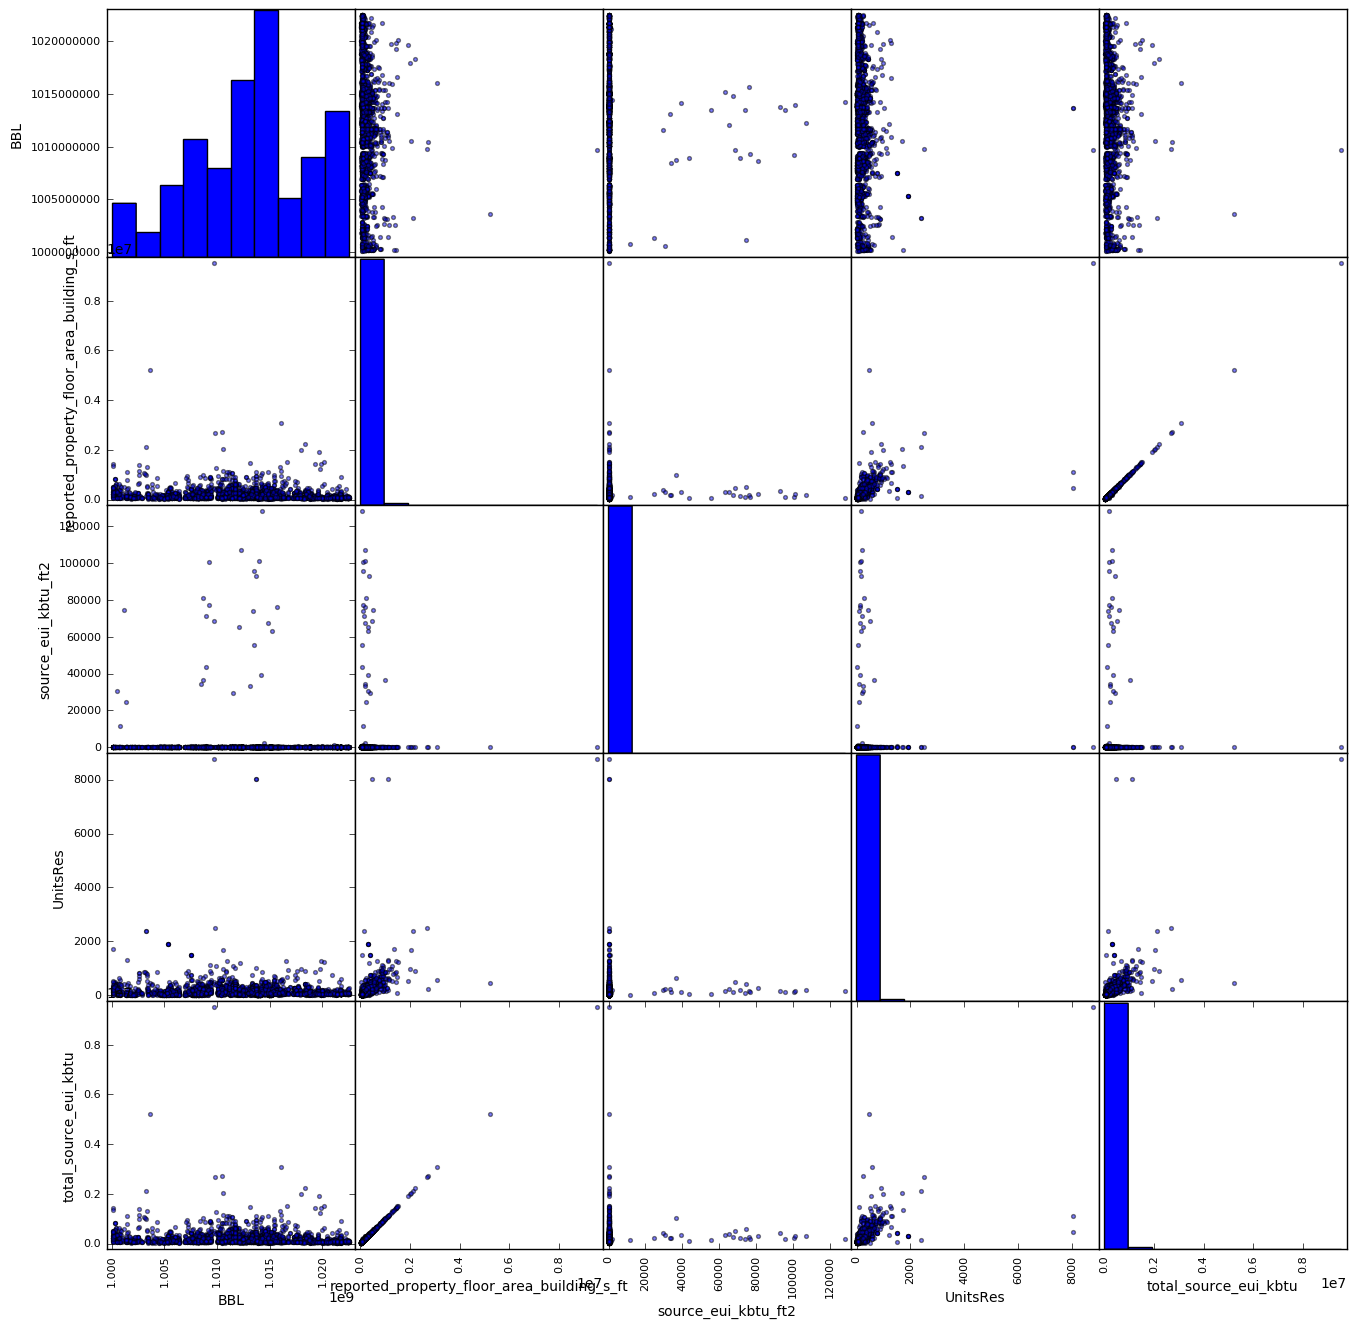

In [307]:
# Now the scatter matrix plot should show more columns.
pd.scatter_matrix (bblnrgdata, s=30, figsize=(16, 16))

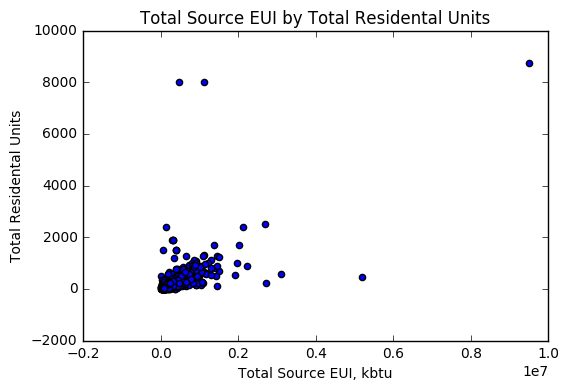

In [308]:
#create scatter plot

pl.scatter(bblnrgdata['total_source_eui_kbtu'], bblnrgdata['UnitsRes'], s = 20)
plt.title('Total Source EUI by Total Residental Units')
pl.xlabel('Total Source EUI, kbtu')
pl.ylabel('Total Residental Units')

[0, 400000, 0, 500]

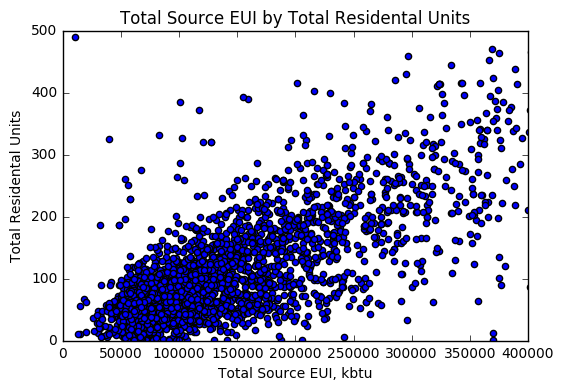

In [309]:
# change axis limits to zoom in on plot

pl.scatter(bblnrgdata['total_source_eui_kbtu'], bblnrgdata['UnitsRes'], s = 20)
plt.title('Total Source EUI by Total Residental Units')
pl.xlabel('Total Source EUI, kbtu')
pl.ylabel('Total Residental Units')
pl.axis([0, 400000, 0, 500])

In [310]:
# remove buildings with more than 500 residental units and energy consumption over 400000 kbtu, which are considered outliners

bblnrgdata = bblnrgdata[bblnrgdata.UnitsRes <= 500]
bblnrgdata = bblnrgdata[bblnrgdata.total_source_eui_kbtu <= 400000]

In [311]:
# add columns for log values

bblnrgdata['log_total_source_eui_kbtu'] = np.log10(bblnrgdata['total_source_eui_kbtu'])
bblnrgdata['log_UnitsRes'] = np.log10(bblnrgdata['UnitsRes'])
bblnrgdata.head()

,BBL,reported_property_floor_area_building_s_ft,source_eui_kbtu_ft2,UnitsRes,total_source_eui_kbtu,log_total_source_eui_kbtu,log_UnitsRes
19,1.021420e+09,64806.0,192.5,54,64998.5,4.812903,1.732394
20,1.021750e+09,62839.0,138.6,75,62977.6,4.799186,1.875061
21,1.003360e+09,98000.0,115.8,128,98115.8,4.991739,2.107210
23,1.008580e+09,60110.0,233.7,56,60343.7,4.780632,1.748188
26,1.012090e+09,56442.0,23.5,8,56465.5,4.751783,0.903090


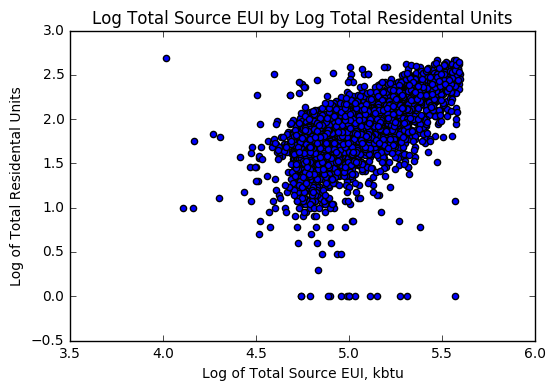

In [312]:
pl.scatter(bblnrgdata['log_total_source_eui_kbtu'], bblnrgdata['log_UnitsRes'], s = 20)
plt.title('Log Total Source EUI by Log Total Residental Units')
pl.xlabel('Log of Total Source EUI, kbtu')
pl.ylabel('Log of Total Residental Units')

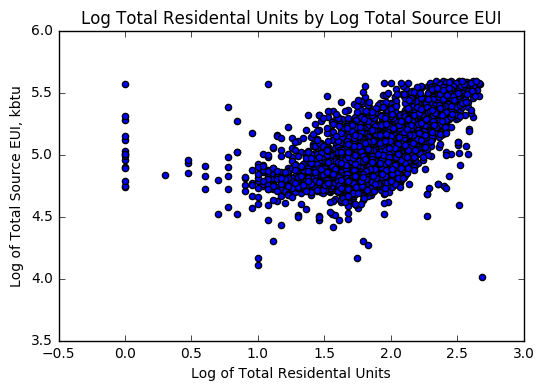

In [313]:
pl.scatter(bblnrgdata['log_UnitsRes'], bblnrgdata['log_total_source_eui_kbtu'], s = 20)
plt.title('Log Total Residental Units by Log Total Source EUI')
pl.xlabel('Log of Total Residental Units')
pl.ylabel('Log of Total Source EUI, kbtu')

In [314]:
# remove residental units with a log equal to 0, or one unit.

bblnrgdata = bblnrgdata[bblnrgdata.log_UnitsRes != 0]

In [344]:
# fit linear regression #1 with units as the indepentant variable (x) and engery as the dependant variable (y).

x1 = bblnrgdata['log_UnitsRes']
y1 = bblnrgdata['log_total_source_eui_kbtu']
X1 = sm.add_constant(x1)
linmodel_1 = sm.OLS(y1, X1).fit()
linmodel_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     log_total_source_eui_kbtu   R-squared:                       0.442
Model:                                   OLS   Adj. R-squared:                  0.442
Method:                        Least Squares   F-statistic:                     2547.
Date:                       Wed, 19 Oct 2016   Prob (F-statistic):               0.00
Time:                               22:33:39   Log-Likelihood:                 909.29
No. Observations:                       3213   AIC:                            -1815.
Df Residuals:                           3211   BIC:                            -1802.
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const            4.1192      0.018    223.882      0.000         4.083     4.155
log_UnitsRes     0.4837      0.010     50.472      0.000         0.465     0.503
==============================================================================
Omnibus:                      113.059   Durbin-Watson:                   1.516
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              304.672
Skew:                           0.097   Prob(JB):                     6.94e-67
Kurtosis:                       4.496   Cond. No.                         13.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

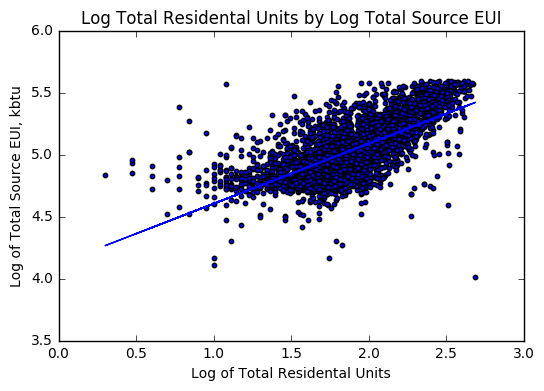

In [345]:
# plot linear regression #1 with point data (units vs energy)

pl.scatter(bblnrgdata['log_UnitsRes'], bblnrgdata['log_total_source_eui_kbtu'], s = 10)
plt.title('Log Total Residental Units by Log Total Source EUI')
pl.xlabel('Log of Total Residental Units')
pl.ylabel('Log of Total Source EUI, kbtu')

pl.plot(x1, linmodel_1.predict(X1))

In [317]:
# fit linear regression #2 with energy as the independant variable (x) and units as the dependant variable (y)

x2 = bblnrgdata['log_total_source_eui_kbtu']
y2 = bblnrgdata['log_UnitsRes']
X2 = sm.add_constant(x2)
linmodel_2 = sm.OLS(y2, X2).fit()
linmodel_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           log_UnitsRes   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     2547.
Date:                Tue, 18 Oct 2016   Prob (F-statistic):               0.00
Time:                        19:40:58   Log-Likelihood:                -113.83
No. Observations:                3213   AIC:                             231.7
Df Residuals:                    3211   BIC:                             243.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
const                        -2.7131      0.091    -29.712      0.000        -2.892    -2.534
log_total_source_eui_kbtu     0.9145      0.018     50.472      0.000         0.879     0.950
==============================================================================
Omnibus:                      622.393   Durbin-Watson:                   1.352
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2046.628
Skew:                          -0.965   Prob(JB):                         0.00
Kurtosis:                       6.401   Cond. No.                         108.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

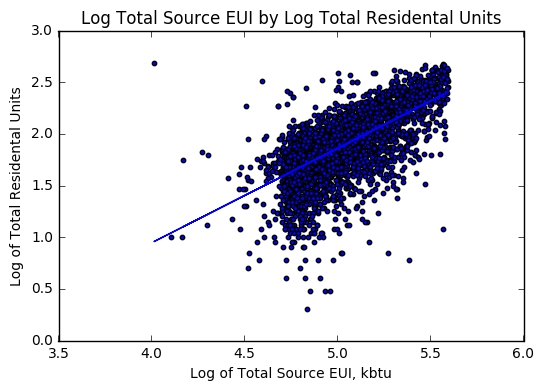

In [318]:
# plot linear regression #2 with point data (energy vs units)

pl.scatter(bblnrgdata['log_total_source_eui_kbtu'], bblnrgdata['log_UnitsRes'], s = 10)
plt.title('Log Total Source EUI by Log Total Residental Units')
pl.xlabel('Log of Total Source EUI, kbtu')
pl.ylabel('Log of Total Residental Units')

pl.plot(x2, linmodel_2.predict(X2))

## choose wisely which is your DEPENDENT and which is your INDEPENDENT variable. 
both for what you want to do logically (what changes as a functino of what) but also based on which variable has a 'sensible' distribution that allows you to fit a function to it: **you need your independent variable to span a large range, and to be spread somewhat evenly in the range, rather than just clustered in a spot** so in this case switching the independent and dependent variable may be a good idea.



1. **Fit a line** to Units vs Energy.
2. **Fit a line** to Energy vs Units.
3. **Evaluate which is better by calculating the chi square**. I provide a function for that or you can write your own. *Assume poisson statistics for the errors on the independent variable*. 
    The function is 
    
    chisq = $\sum_i \frac{(model(x_i) - data(x_i))^2 }{ error_i^2}$
    
    where the sum is over all datapoints, 
    
    for the i-th value with x value $x_i$ model is the predction of your fit for $x_i$, 
    
    $data(x_i)$ 
    is your observation, 
    
    and $error_i$ is $\sqrt{data(x_i)}$
    (but remember you worked in log space! What are the proper errors??)
    
4. **Fit a 2nd degree polynomial** to the Units vs Energy (with statsmodels.formulae.api.ols() for example passing the formula for a parabola, like we did in class. The formula for a 2nd deg polynomial is 
    $y = ax^2+bx+c$ .

5. **Compare the Units vs Energy line fit and the Units vs Energy 2-nd degree polynomial fit with the Likelihood ratio test**. The formula is:
    
    LR  =  -2 * (logLikelihood_Model1 - logLikelihood_Model2)
    
    where Model1 is the least complex (fewer parameters).
    
    Th logLikelihood can be extracted from the model summary when using statsmodels.
    
    Compare this LR statistics to a chi sq table (for example http://passel.unl.edu/Image/Namuth-CovertDeana956176274/chi-sqaure%20distribution%20table.PNG) and say if *at alpha = 0.05* Model1 is preferible to Model2. The LR is chi^2 distributed with number of degrees of freedom N_{DOF} = parameters_Model2 - parameters_Model1
    
    
    Also if you used statsmodels for the fit you can use the 
    compare_lr_test() method of your fit and verify you got the right answer.  Use the method compare_lr_test() of the most complex model of the 2 and pass it the result of stats models for the simpler fit 
    (e.g. smf.ols(formula = ...).fit().compare_lr_test(sm.OLS(...).fit()))



In [339]:
# calculate error for regression #1 with energy as the dependant variable

var1 = np.mean(bblnrgdata['total_source_eui_kbtu'])
e_1 = sqrt(log10(var1))
print(e_1)

2.25939739539


In [340]:
# calculate chisq for regression #1

chisq_1 = np.sum((np.power(linmodel_1.predict(X1) - x1, 2))/e_1)
print(chisq_1)

14094.0464304


In [341]:
# calculate error for regression #2 with units as the dependant variable

var2 = np.mean(bblnrgdata['UnitsRes'])
e_2 = sqrt(log10(var2))
print(e_2)

1.41754934111


In [342]:
# calculate chisq for regression #2

chisq_2 = np.sum((np.power(linmodel_2.predict(X2) - x2, 2))/e_2)
print(chisq_2)

22397.0555592


## ChiSq 1 < ChiSq2

Regression #1 using energy as the dependant variable is the better fit. This is also the more useful model, as it's
more likely that energy will be unknown compared to the numbers of units.

In [368]:
dataDF = pd.DataFrame()

In [370]:
# create new data frame to fit second degree polynomial

dataDF['x'] = x1
dataDF['x2'] = x1 * x1
dataDF['y'] = y1
dataDF.head()

,x,x2,y
19,1.732394,3.001188,4.812903
20,1.875061,3.515855,4.799186
21,2.107210,4.440334,4.991739
23,1.748188,3.056161,4.780632
26,0.903090,0.815572,4.751783


In [371]:
# perform curvemodel regression

curvemodel = smf.ols(formula = 'y ~ x2 + x', data=dataDF).fit()
curvemodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     1693.
Date:                Thu, 20 Oct 2016   Prob (F-statistic):               0.00
Time:                        12:23:30   Log-Likelihood:                 1128.1
No. Observations:                3213   AIC:                            -2250.
Df Residuals:                    3210   BIC:                            -2232.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      5.2994      0.057     92.687      0.000         5.187     5.412
x2             0.3672      0.017     21.643      0.000         0.334     0.400
x             -0.8567      0.063    -13.690      0.000        -0.979    -0.734
==============================================================================
Omnibus:                      276.503   Durbin-Watson:                   1.571
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1719.574
Skew:                          -0.088   Prob(JB):                         0.00
Kurtosis:                       6.580   Cond. No.                         127.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [359]:
np.random.seed(500)

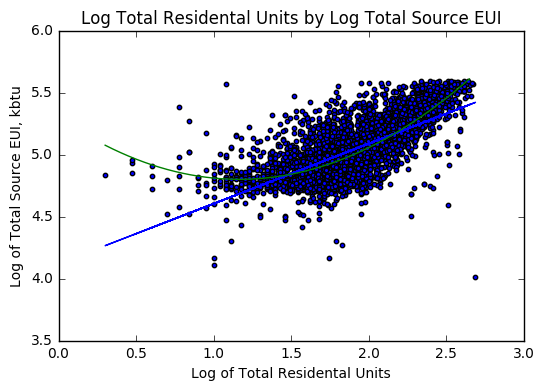

In [373]:
# plot polynominal best fit with linear regression #1 and data points

pl.scatter(bblnrgdata['log_UnitsRes'], bblnrgdata['log_total_source_eui_kbtu'], s = 10)
plt.title('Log Total Residental Units by Log Total Source EUI')
pl.xlabel('Log of Total Residental Units')
pl.ylabel('Log of Total Source EUI, kbtu')

pl.plot(x1, linmodel_1.predict(X1))

dfnew = pd.DataFrame()
dfnew['x'] = np.arange(x1.min(), x1.max(), .05)
dfnew['x2'] = dfnew['x'] * dfnew['x']

pl.plot(dfnew['x'], curvemodel.predict(dfnew))

In [375]:
print ("LR : ", -2 * (-linmodel_1.llf - (-curvemodel.llf)))
print ("LR from statsmodels:", curvemodel.compare_lr_test(linmodel_1))

LR :  -437.656297192
LR from statsmodels: (437.65629719221761, 3.5037195558234431e-97, 1.0)
